In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt


In [2]:
data = pd.read_csv("./data_files/application_record.csv") 


In [3]:
df = pd.DataFrame(data)


In [4]:
df.head()


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [5]:
# data.rename(columns={'CODE_GENDER':'gender','FLAG_OWN_CAR':'has_car','FLAG_OWN_REALTY':'has_realty',
#                          'CNT_CHILDREN':'num_of_children','AMT_INCOME_TOTAL':'income',
#                          'NAME_EDUCATION_TYPE':'education','NAME_FAMILY_STATUS':'family_status',
#                         'NAME_HOUSING_TYPE':'housing_type','DAYS_BIRTH':'age','DAYS_EMPLOYED':'years_of_employment','FLAG_EMAIL':'has_email',
#                          'NAME_INCOME_TYPE':'income_type','FLAG_MOBIL':'has_mobile','FLAG_WORK_PHONE':'has_work_phone',
#                          'FLAG_PHONE':'has_phone','CNT_FAM_MEMBERS':'family_size',
#                         'OCCUPATION_TYPE':'occupation_type'
#                         },inplace=True)
data


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [6]:
data['AGE']=-data['DAYS_BIRTH']//365


In [7]:
data['WORK_EXP']=-data['DAYS_EMPLOYED']//365
data[data['WORK_EXP']<0]=np.nan



In [8]:
data['WORK_EXP'].value_counts()

1.0     38719
2.0     37405
0.0     33628
3.0     33524
4.0     30922
5.0     24163
6.0     23693
7.0     21648
8.0     19175
9.0     15278
10.0    12156
11.0     9518
12.0     8703
14.0     7633
13.0     7419
15.0     5243
16.0     3832
17.0     3339
19.0     3189
18.0     3035
20.0     2572
21.0     2542
22.0     2331
23.0     1722
24.0     1594
25.0     1386
26.0     1250
27.0     1205
28.0     1139
29.0      960
31.0      787
30.0      609
32.0      537
34.0      526
33.0      411
35.0      364
36.0      228
37.0      208
39.0      182
38.0      136
41.0      102
40.0      100
42.0       54
44.0       33
43.0       14
45.0        8
48.0        6
Name: WORK_EXP, dtype: int64

<AxesSubplot:xlabel='AGE', ylabel='Proportion'>

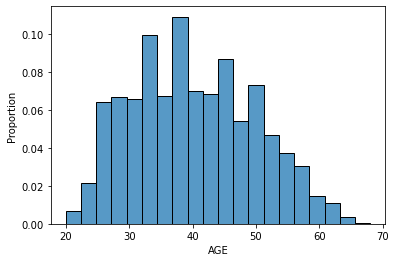

In [9]:
sns.histplot(data=data, x="AGE", bins=20, stat='proportion')


<AxesSubplot:xlabel='WORK_EXP', ylabel='Proportion'>

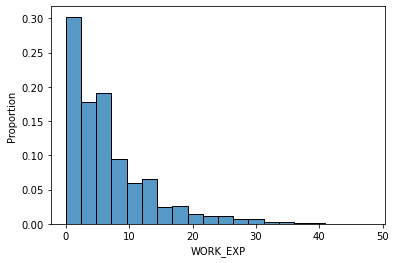

In [10]:
sns.histplot(data=data, x="WORK_EXP", bins=20, stat='proportion')


<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='Proportion'>

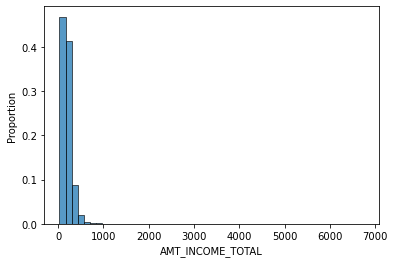

In [11]:
data['AMT_INCOME_TOTAL'] = data['AMT_INCOME_TOTAL']/1000
sns.histplot(data=data, x="AMT_INCOME_TOTAL", bins=50, stat='proportion')


In [12]:
print(data['AMT_INCOME_TOTAL'].min(), data['AMT_INCOME_TOTAL'].max())


27.0 6750.0


[Text(0, 0.5, 'Counts')]

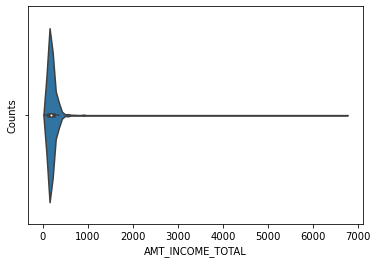

In [13]:
vplot = sns.violinplot(data=data, x="AMT_INCOME_TOTAL")
vplot.set(ylabel='Counts')

<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='CODE_GENDER'>

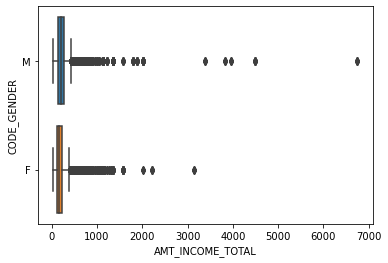

In [14]:
sns.boxplot(data=data, x="AMT_INCOME_TOTAL", y='CODE_GENDER')


<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='NAME_EDUCATION_TYPE'>

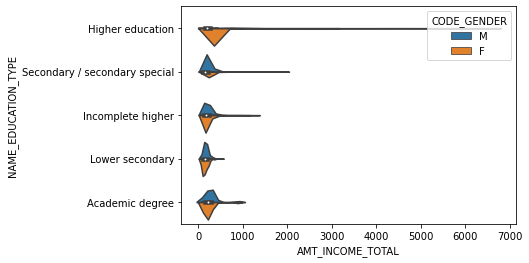

In [15]:
sns.violinplot(data=data, x="AMT_INCOME_TOTAL", y='NAME_EDUCATION_TYPE', hue='CODE_GENDER', gridsize=10, split=True)


<AxesSubplot:xlabel='AGE', ylabel='AMT_INCOME_TOTAL'>

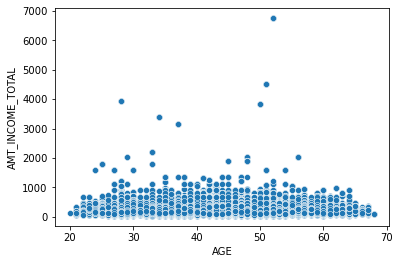

In [16]:
sns.scatterplot(data=data, x="AGE", y='AMT_INCOME_TOTAL')


<AxesSubplot:xlabel='ID', ylabel='CNT_FAM_MEMBERS'>

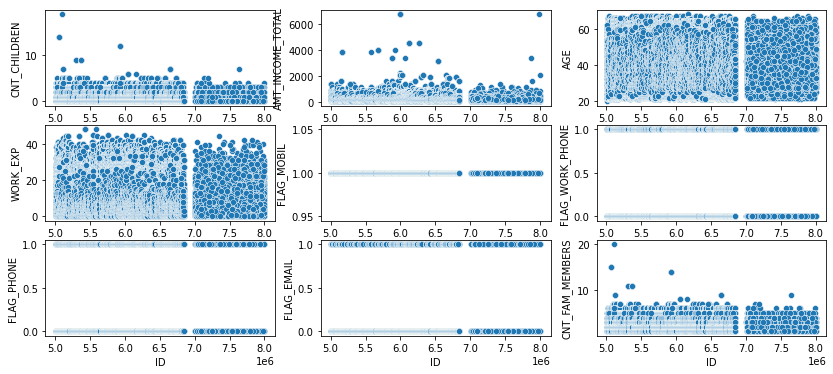

In [21]:
fig, ax= plt.subplots(nrows= 3, ncols = 3, figsize= (14,6))

sns.scatterplot(x='ID', y='CNT_CHILDREN', data=data, ax=ax[0][0])
sns.scatterplot(x='ID', y='AMT_INCOME_TOTAL', data=data, ax=ax[0][1])
sns.scatterplot(x='ID', y='AGE', data=data, ax=ax[0][2])

sns.scatterplot(x='ID', y='WORK_EXP', data=data, ax=ax[1][0])
sns.scatterplot(x='ID', y='FLAG_MOBIL', data=data, ax=ax[1][1])
sns.scatterplot(x='ID', y='FLAG_WORK_PHONE', data=data, ax=ax[1][2])

sns.scatterplot(x='ID', y='FLAG_PHONE', data=data, ax=ax[2][0])
sns.scatterplot(x='ID', y='FLAG_EMAIL', data=data, ax=ax[2][1])
sns.scatterplot(x='ID', y='CNT_FAM_MEMBERS', data=data, ax=ax[2][2])
